In [ ]:
# 任意位置横盘测试
import horizontal_area as ha
import high_low_xuejie_zuhui as hl
filename = '000001.SZ.csv'
df = hl.df_init(filename)
high_points, low_points = hl.find_high_low(df, filename, save_data=False, draw_n_days=400)
result = ha.find_horizontal_area(df, high_points, low_points, gamma=0.1, fft_percentile=100, min_len_of_window=3, ignore_hl=False)
ha.draw_horizontal_area(df, result, high_points, low_points, filename, n_days=200, print_result=False, show_plot=True, save_plot=False)

In [ ]:

result = ha.find_horizontal_area(df, high_points, low_points, view_coe=1.5, gamma=0.1, only_past=True, fft_percentile=100, min_len_of_window=3, ignore_hl=False)

In [ ]:
ha.draw_horizontal_area(df, result, high_points, low_points, filename, n_days=200, print_result=False, show_plot=True, save_plot=False)

In [ ]:
result['interval'].describe()

In [ ]:
# hl median测试
import horizontal_area as ha
import high_low_xuejie_zuhui as hl
filename = '000001.SZ.csv'
df = hl.df_init(filename)
high_points, low_points = hl.find_high_low(
    df, filename, save_data=False, draw=False)
result = ha.find_ha_near_hl_median(df, high_points, low_points, 0.03)
ha.draw_horizontal_area(df, result, high_points, low_points, filename,
                        n_days=270, print_result=False, show_plot=True, save_plot=False)


In [ ]:
# 对上方得到的data曲线进行DFT变换，得到频域上的信号
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd
import high_low_xuejie_zuhui as hl
filename = '000002.SZ.csv'
df = hl.df_init(filename)
data = df.tail(200)
data.plot(x='TRADE_DT', y='S_DQ_CLOSE', figsize=(20, 10))
# 对data进行DFT变换
data_fft = fft(data['S_DQ_CLOSE'].values)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(data_fft)
plt.show()
# 计算频谱中的总能量，并计算高频成分所占的比例。如果高频成分所占比例较小，那么曲线就比较平滑。
# 计算频谱中的总能量
energy = (data_fft * np.conj(data_fft)).real
# 计算高频成分所占的比例
high_freq_ratio = np.sum(energy[10:]) / np.sum(energy)
print(high_freq_ratio)
# 对高频成分进行滤波
data_fft_filtered = data_fft.copy()
data_fft_filtered[15:] = 0
# 对滤波后的数据进行逆变换
data_filtered = ifft(data_fft_filtered)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(data_filtered)
plt.show()

In [ ]:
# 对data曲线进行DFT变换，得到频域上的信号
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd
import high_low_xuejie_zuhui as hl
filename = '000002.SZ.csv'
df = hl.df_init(filename)
data = df.tail(200)
# 将data等分为20份，对每份按照上述方法求的高频成分所占比例
n = 20
data_list = np.array_split(data, n)
high_freq_ratio_list = []
for temp_data in data_list:
    data_fft = fft(temp_data['S_DQ_CLOSE'].values)
    energy = (data_fft * np.conj(data_fft)).real
    high_freq_ratio = np.sum(energy[3:]) / np.sum(energy)
    high_freq_ratio_list.append(high_freq_ratio)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(high_freq_ratio_list)
plt.show()
print(high_freq_ratio_list)
# 使用plt.axvspan将高频成分占比可视化到data曲线上，高频占比越高的区域颜色越深
plt.figure(figsize=(20, 10))
plt.plot(data['S_DQ_CLOSE'].values)
for i in range(len(high_freq_ratio_list)):
    plt.axvspan(i * 10, (i + 1) * 10, facecolor='r',
                alpha=high_freq_ratio_list[i] * 100)

In [ ]:
heal = 0
baoji = 0.51+0.32
baoshang = 0.61
loss = 0.9
a = round(567+0.8*(4655+2394*(1+heal))+(567+0.8*(4655+2394*(1+heal)))*baoji*(baoshang))
final = round(540+0.8*(4655+2394*(1+heal))+0.8*loss*(4655+2394*(1+heal))+(540+0.8*(4655+2394*(1+heal))+0.8*loss*(4655+2394*(1+heal)))*baoji*(baoshang))
print(a, final)

In [ ]:
heal = 0
baoji = 0.51
baoshang = 0.61+0.64
loss = 0.9
a = round(567+0.8*(4655+2394*(1+heal))+(567+0.8*(4655+2394*(1+heal)))*baoji*(baoshang))
final = round(540+0.8*(4655+2394*(1+heal))+0.8*loss*(4655+2394*(1+heal))+(540+0.8*(4655+2394*(1+heal))+0.8*loss*(4655+2394*(1+heal)))*baoji*(baoshang))
print(a, final)

In [ ]:
100*1.1

In [ ]:
import high_low_xuejie_zuhui as hl
from crash import *
df = hl.df_init('000001.SZ.csv')
result = crash(df, threshold=0.3)
print(result)
draw_crash(df, result, '2008-01', '2009-01-01')

In [4]:
from high_low_xuejie_zuhui import find_high_low
def waves_price_change(df):
    """
    计算了df中每个波段的涨跌幅
    """
    df_cache = df.copy()
    df_cache.reset_index(drop=True, inplace=True)
    highs, lows = find_high_low(df_cache, draw=False)
    high_price = [item['high_price'] for item in highs]
    low_price = [item['low_price'] for item in lows]
    h=[]
    l=[]
    for i in range(1, len(highs)-1):
        if high_price[i] < high_price[i-1] and high_price[i] < high_price[i+1]:
            h.append(highs[i]['high_date'])
        if low_price[i] > low_price[i-1] and low_price[i] > low_price[i+1]:
            l.append(lows[i]['low_date'])
    # 计算h中相邻两日期的差值
    h_diff = []
    for i in range(1, len(h)-1):
        h_diff.append((h[i] - h[i-1]).days)
    # 计算l中相邻两日期的差值
    l_diff = []
    for i in range(1, len(l)):
        l_diff.append((l[i] - l[i-1]).days)
    return h_diff, l_diff

In [7]:
import pandas as pd
import high_low_xuejie_zuhui as hl
import os
from tqdm import tqdm

count=0
h_diff = []
l_diff = []
data_directory = '/Users/kai/Desktop/qs/data_csv_distinct_0606'
for filename in tqdm(os.listdir(data_directory)):
    if filename.endswith('.csv'):
        df = hl.df_init(filename)
    if count > 30:
        break
    h_diff1, l_diff1 = waves_price_change(df)
    h_diff.extend(h_diff1)
    l_diff.extend(l_diff1)
    count+=1

  1%|          | 31/5445 [00:07<21:03,  4.29it/s]


In [8]:
h_diff = pd.Series(h_diff)
h_diff.describe()

count    609.000000
mean     187.399015
std      127.169515
min       26.000000
25%       98.000000
50%      161.000000
75%      233.000000
max      953.000000
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f99ea35cd60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f99ea3724c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f99ea35c9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f99ea372be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f99ea372f70>],
 'means': []}

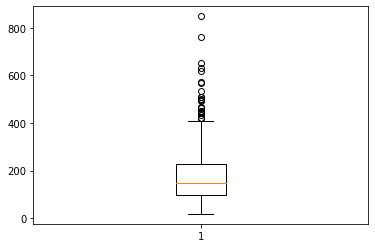

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(l_diff)

In [20]:
a=[]
for i in range(1,5):
    if i % 2:
        print(i)
        a.append(i)
print(df.iloc[a])
df

1
3
    TRADE_DT  S_DQ_CLOSE
1 2023-02-10       49.24
3 2023-02-14       43.73


,TRADE_DT,S_DQ_CLOSE
0,2023-02-09,54.78
1,2023-02-10,49.24
2,2023-02-13,46.28
3,2023-02-14,43.73
4,2023-02-15,45.70
...,...,...
75,2023-05-31,38.15
76,2023-06-01,37.65
77,2023-06-02,37.70
78,2023-06-05,38.39
